In [4]:
from frozen_yoghourt import *

Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 2 ('backend: TkAgg')
Duplicate key in file '/Users/minhpham/.matplotlib/matplotlibrc', line 3 ('backend: TkAgg')
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [5]:
from scipy.linalg import fractional_matrix_power as mat_pow

In [6]:
from qiskit.visualization import *

In [165]:
from qiskit.quantum_info import *

In [192]:
from qiskit.circuit.library import *

In [433]:
def SS(n):
    if n == 1:
        circ = QuantumCircuit(2)
        circ.cz(0, 1)
        
        return circ
    if n == 2:
        circ = QuantumCircuit(3)
        circ.p(np.pi/4, [0, 1, 2])

        ### First Group
        circ.cx(0, 1)
        circ.p(-np.pi/4, 1)
        circ.cx(0, 1)

        ### Second Group
        circ.cx(1, 2)
        circ.p(-np.pi/4, 2)
        circ.cx(0, 2)
        circ.p(np.pi/4, 2)
        circ.cx(1, 2)
        circ.p(-np.pi/4, 2)
        circ.cx(0, 2)
        
        return circ
        
    elif n==3:
        circ = QuantumCircuit(4)
        circ.h(3)
        circ.append(C3XGate(), [0, 1, 2, 3])
        circ.h(3)
        circ = circ.decompose()
        
        return circ
        
    elif n==4:
        circ = QuantumCircuit(5)
        circ.p(np.pi/16, [0, 1, 2, 3, 4])

        ### First Group
        circ.cx(0, 1)
        circ.p(-np.pi/16, 1)
        circ.cx(0, 1)

        ### Second Group
        circ.cx(1, 2)
        circ.p(-np.pi/16, 2)
        circ.cx(0, 2)
        circ.p(np.pi/16, 2)
        circ.cx(1, 2)
        circ.p(-np.pi/16, 2)
        circ.cx(0, 2)

        ### Third Group
        circ.cx(2, 3)
        circ.p(-np.pi/16, 3)
        circ.cx(0, 3)
        circ.p(np.pi/16, 3)
        circ.cx(1, 3)
        circ.p(-np.pi/16, 3)
        circ.cx(0, 3)
        circ.p(np.pi/16, 3)
        circ.cx(2, 3)
        circ.p(-np.pi/16, 3)
        circ.cx(0, 3)
        circ.p(np.pi/16, 3)
        circ.cx(1, 3)
        circ.p(-np.pi/16, 3)
        circ.cx(0, 3)

        ### Fourth Group
        circ.cx(3, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(1, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(2, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(1, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(3, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(1, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(2, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        circ.p(np.pi/16, 4)
        circ.cx(1, 4)
        circ.p(-np.pi/16, 4)
        circ.cx(0, 4)
        
        return circ

In [434]:
def PP(n):
        
    ## Base cases
    if n==1:
        qc = q(2)
        qc.cx(0, 1)
        return qc
    
    if n==2:
        qc = q(3)
        qc.h(2)
        qc.t(2)
        qc.cx(1, 2)
        qc.tdg(2)
        qc.cx(0, 2)
        qc.t(2)
        qc.cx(1, 2)
        qc.tdg(2)
        qc.h(2)
        return qc
    
    if n==3:
        
        qc = q(4)
        qc.h(3)
        qc.t(3)
        qc.cx(2, 3)
        
        qc.tdg(3)
        qc.h(3)
        qc.cx(0, 3)
        qc.t(3)
        qc.cx(1, 3)
        qc.tdg(3)
        qc.cx(0, 3)
        qc.t(3)
        qc.cx(1, 3)
        qc.tdg(3)
        qc.h(3)
        qc.t(3)
        qc.cx(2, 3)
        qc.tdg(3)
        qc.h(3)
        return qc
    
    ## Since the gate is split into 3 parts, we need to build 3 lists of indices
    a = int(np.ceil(n/3))
    c = int(np.floor(n/3))
    b = int(n-a-c)
      
    first = PP(a)
    second = PP(b)
    third = PP(c)
    
    ind = list(range(int(n)))

    ind1 = ind[:int(a)] + [n]
    ind2 = ind[int(a):int(a)+int(b)] + [n]
    ind3 = ind[int(a)+int(b):] + [n]
    
    # Create full circuit
    circ = q(n+1)
    
    ## Third piece
    circ.h(n)
    circ.t(n)
    circ = circ.compose(third, ind3)
    
    ## First piece
    circ.tdg(n)
    circ.h(n)
    circ = circ.compose(first, ind1)
    
    ## Second piece
    circ.t(n)
    circ = circ.compose(second, ind2) 
    
    ## First piece
    circ.tdg(n)
    circ = circ.compose(first, ind1)
    
    ## Second piece
    circ.t(n)
    circ = circ.compose(second, ind2)
    
    ## Third piece
    circ.tdg(n)
    circ.h(n)
    circ.t(n)
    circ = circ.compose(third, ind3)
    
    circ.tdg(n)
    circ.h(n)
    
    return circ



In [435]:
def CG(n):

    m = (n-7)//2

    circ = q(n+1)

    circ.h(n)
    circ.t(n)
    circ.h(n)

    if n%2 == 1:
        circ.rccx(n, n-1, n-2)
    else:
        circ.rccx(n, n-2, n-3)

    for i in reversed(range(m)):
        circ.rccx(2*i+7, 2*i+6, 2*i+5)

    circ.h(2)
    circ.ccx(5, 4, 2)
    circ.h(2)

    for i in range(m):
        circ.rccx(2*i+7, 2*i+6, 2*i+5)

    if n%2 == 1:
        circ.rccx(n, n-1, n-2)
    else:
        circ.rccx(n, n-2, n-3)

    circ.h(n)
    circ.tdg(n)
    circ.h(n)

    

    ### BEGIN MIDDLE

    if n%2 == 1:
        circ.cx(2*(n//2)+1, 2*(n//2))

    for i in reversed(range(1, n//2)):
        circ.rccx(2*i+2, 2*i+1, 2*i)

    circ.h(0)
    circ.ccx(2, 1, 0)
    circ.h(0)

    for i in range(1, n//2):
        circ.rccx(2*i+2, 2*i+1, 2*i)

    if n%2 == 1:
        circ.cx(2*(n//2)+1, 2*(n//2))

    ### END MIDDLE

    

    circ.h(n)
    circ.t(n)
    circ.h(n)

    if n%2 == 1:
        circ.rccx(n, n-1, n-2)
    else:
        circ.rccx(n, n-2, n-3)

    for i in reversed(range(m)):
        circ.rccx(2*i+7, 2*i+6, 2*i+5)

    circ.h(2)
    circ.ccx(5, 4, 2)
    circ.h(2)

    for i in range(m):
        circ.rccx(2*i+7, 2*i+6, 2*i+5)

    if n%2 == 1:
        circ.rccx(n, n-1, n-2)
    else:
        circ.rccx(n, n-2, n-3)


    circ.h(n)
    circ.tdg(n)
    circ.h(n)


    return circ

In [436]:
def SRTS():
    circ = QuantumCircuit(3)
    circ.h(2)
    circ.cx(2, 1)
    circ.tdg(1)
    circ.cx(0, 1)
    circ.t(1)
    circ.cx(2, 1)
    circ.tdg(1)
    circ.cx(0, 1)
    circ.t(1)
    
    SRTS = circ.to_gate()
    
    SRTS.name = ' SRTS '
    return SRTS

def RTS():
    circ = QuantumCircuit(3)
    circ.h(2)
    circ.t(2)
    circ.cx(1, 2)
    circ.tdg(2)
    circ.cx(0, 2)
    
    RTS = circ.to_gate()
    RTS.name = ' RTS '
    
    return RTS

def RT4L():
    
    circ = QuantumCircuit(4)
    circ.h(3)
    circ.t(3)
    circ.cx(2, 3)
    circ.tdg(3)
    circ.h(3)
    circ.cx(0, 3)
    circ.t(3)
    circ.cx(1, 3)
    circ.tdg(3)
    circ.cx(0, 3)
    circ.t(3)
    circ.cx(1, 3)
    circ.tdg(3)
    circ.h(3)
    circ.t(3)
    circ.cx(2, 3)
    circ.tdg(3)
    circ.h(3)
    
    RT4L = circ.to_gate()
    
    RT4L.name = ' RT4L '
    
    return RT4L

def RT4S():
    
    circ = QuantumCircuit(4)
    circ.h(3)
    circ.t(3)
    circ.cx(2, 3)
    circ.tdg(3)
    circ.h(3)
    circ.cx(0, 3)
    circ.t(3)
    circ.cx(1, 3)
    circ.tdg(3)
    circ.cx(0, 3)
    
    RT4S = circ.to_gate()
    
    RT4S.name = ' RT4S '
    
    return RT4S

def DM(n):
    m = int(n+np.ceil((n-2)/2))

    circ = QuantumCircuit(m+1)

    circ.append(SRTS(), [n-1, m-1, m])

    # Even
    if (n-4)%2 == 0:
        for i in reversed(range(int((n-4)/2))):
            circ.append(RT4S(), [n+i, 4+2*i, 3+2*i, n+1+i])

    # Odd
    if (n-4)%2 == 1:
        circ.append(RTS(), [m-2, n-2, m-1])

        for i in reversed(range(int((n-4)/2))):
            circ.append(RT4S(), [n+i, 4+2*i, 3+2*i, n+1+i])

    ### Keep

    circ.append(RT4L(), [0, 1, 2, n])

    ### Keep

    # Even
    if (n-4)%2 == 0:
        for i in range(int((n-4)/2)):
            circ.append(RT4S().inverse(), [n+i, 4+2*i, 3+2*i, n+1+i])

    # Odd
    if (n-4)%2 == 1:
        for i in range(int((n-4)/2)):
            circ.append(RT4S().inverse(), [n+i, 4+2*i, 3+2*i, n+1+i])

        circ.append(RTS().inverse(), [m-2, n-2, m-1])

    circ.append(SRTS().inverse(), [n-1, m-1, m])

    # Even
    if (n-4)%2 == 0:
        for i in reversed(range(int((n-4)/2))):
            circ.append(RT4S(), [n+i, 4+2*i, 3+2*i, n+1+i])

    # Odd
    if (n-4)%2 == 1:
        circ.append(RTS(), [m-2, n-2, m-1])

        for i in reversed(range(int((n-4)/2))):
            circ.append(RT4S(), [n+i, 4+2*i, 3+2*i, n+1+i])

    ### Keep

    circ.append(RT4L().inverse(), [0, 1, 2, n])

    ### Keep

    # Even
    if (n-4)%2 == 0:
        for i in range(int((n-4)/2)):
            circ.append(RT4S().inverse(), [n+i, 4+2*i, 3+2*i, n+1+i])

    # Odd
    if (n-4)%2 == 1:
        for i in range(int((n-4)/2)):
            circ.append(RT4S().inverse(), [n+i, 4+2*i, 3+2*i, n+1+i])

        circ.append(RTS().inverse(), [m-2, n-2, m-1])


    return circ

### Comparison

In [437]:
pp_cost = []
cg_cost = []
dm_cost = []

for n in range(5, 35):
    pp_cost.append(transpile(PP(n), basis_gates = ['u', 'cx']).count_ops()['cx'])
    cg_cost.append(transpile(CG(n), basis_gates = ['u', 'cx']).count_ops()['cx'])
    dm_cost.append(transpile(DM(n), basis_gates = ['u', 'cx']).count_ops()['cx'])

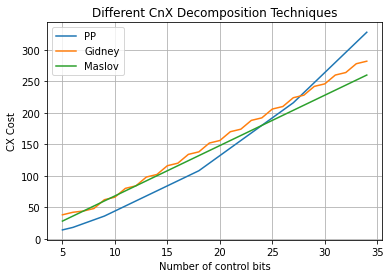

In [438]:
%matplotlib inline

plt.ylabel('CX Cost')
plt.xlabel('Number of control bits')
plt.title('Different CnX Decomposition Techniques')

plt.plot(range(5, 35), pp_cost, label = 'PP')
plt.plot(range(5, 35), cg_cost, label = 'Gidney')
plt.plot(range(5, 35), dm_cost, label = 'Maslov')

plt.grid()

leg = plt.legend(loc='upper left')

In [439]:
def nZ(n):
    a = np.identity(2**(n+1))
    a[2**(n+1)-1, 2**(n+1)-1] = -1
    
    return a

In [440]:
def RCnX(qc, n, m, inv = False):
            
    if inv:
        
        if m < 24:
            qc = qc.compose(PP(m).inverse(), range(m+1))

        elif m + np.ceil((m-2)/2) <= n:
            qc = qc.compose(DM(m).inverse(), list(range(m)) + list(reversed(range(m, int(m+1+np.ceil((m-2)/2))))))

        else:
            qc = qc.compose(CG(m).inverse(), range(m+1))
            
    else:
        
        if m < 24:
            qc = qc.compose(PP(m), range(m+1))

        elif m + np.ceil((m-2)/2) <= n:
            qc = qc.compose(DM(m), list(range(m)) + list(reversed(range(m, int(m+1+np.ceil((m-2)/2))))))

        else:
            qc = qc.compose(CG(m), range(m+1))
        
    return qc

In [452]:
def CnZ(n):
    circ = QuantumCircuit(n+1)
    
    if n<5:
        circ = SS(n)
    else:
        for m in reversed(range(2, n+1)):

            circ.cp(np.pi/2**(n-m+1), m-1, n)

            # circ.mct(list(range(m-1)), m-1)
            circ = RCnX(circ, n, m-1)

            circ.cp(-np.pi/2**(n-m+1), m-1, n)

            # circ.mct(list(range(m-1)), m-1)
            circ = RCnX(circ, n, m-1, inv = True)

        circ.cp(np.pi/2**(n-1), 0, n)
    
    return circ

In [470]:
for n in range(34, 50):
    cx_list[n] = transpile(CnZ(n), basis_gates = ['u', 'cx']).count_ops()['cx']

KeyboardInterrupt: 

In [471]:
cx_list

{1: 1,
 2: 6,
 3: 14,
 4: 30,
 5: 58,
 6: 90,
 7: 130,
 8: 182,
 9: 246,
 10: 322,
 11: 414,
 12: 522,
 13: 646,
 14: 786,
 15: 942,
 16: 1114,
 17: 1302,
 18: 1506,
 19: 1726,
 20: 1970,
 21: 2238,
 22: 2530,
 23: 2846,
 24: 3186,
 25: 3574,
 26: 3990,
 27: 4414,
 28: 4866,
 29: 5326,
 30: 5814,
 31: 6310,
 32: 6834,
 33: 7366,
 34: 7926,
 35: 8470,
 36: 9066,
 37: 9634,
 38: 10238,
 39: 10878,
 40: 11506,
 41: 12142,
 42: 12842,
 43: 13506,
 44: 14206,
 45: 14950}

In [472]:
y = np.array(list(cx_list.values()))

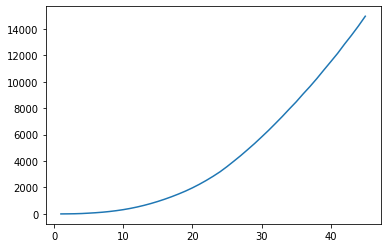

In [474]:
plt.plot(range(1, 46), y)

In [475]:
a = y[1:] - y[:-1]

In [477]:
a

array([  5,   8,  16,  28,  32,  40,  52,  64,  76,  92, 108, 124, 140,
       156, 172, 188, 204, 220, 244, 268, 292, 316, 340, 388, 416, 424,
       452, 460, 488, 496, 524, 532, 560, 544, 596, 568, 604, 640, 628,
       636, 700, 664, 700, 744])

In [476]:
a[1:] - a[:-1]

array([  3,   8,  12,   4,   8,  12,  12,  12,  16,  16,  16,  16,  16,
        16,  16,  16,  16,  24,  24,  24,  24,  24,  48,  28,   8,  28,
         8,  28,   8,  28,   8,  28, -16,  52, -28,  36,  36, -12,   8,
        64, -36,  36,  44])

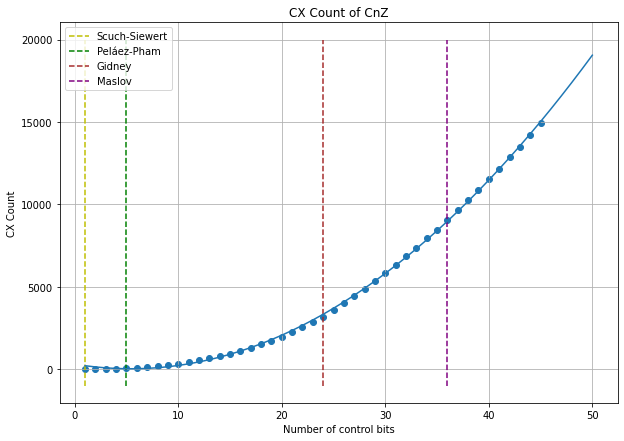

In [532]:
import numpy as np
import scipy.stats as stats

#add legend

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(range(1, 46), y, 2))

plt.figure(figsize = (10, 7))
plt.title('CX Count of CnZ')
plt.xlabel('Number of control bits')
plt.ylabel('CX Count')

plt.grid()

plt.vlines(1, -1000, 20_000, 'y', 'dashed', label = 'Scuch-Siewert')
plt.vlines(5, -1000, 20_000, 'g', 'dashed', label = 'Peláez-Pham')
plt.vlines(24, -1000, 20_000, 'brown', 'dashed', label = 'Gidney')
plt.vlines(36, -1000, 20_000, 'purple', 'dashed', label = 'Maslov')

plt.legend()

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 50, 50)
plt.scatter(range(1, 46), y)
plt.plot(polyline, model(polyline))
plt.show()

Note that dashed lines indicated the beginning of each scheme 

The function of the $CX$ count, $c_n$ follows the line of regression

$c_n = 9.58n^2 - 103.68n + 296.20$

where $n$ is the number of control bits in the gate $CnZ$

The fit has an $R^2$ value of $0.9997$

In [495]:
view(model)

Matrix([
[    9.576317572],
[-103.6834673348],
[ 296.1977448908]])

In [491]:
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(range(1, 46), y, 2)

{'r_squared': 0.9996994560373432}

In [534]:
y[15]

1114